### 이진 분류 알고리즘
* Binary Classification
* 분류에 해당하는 레이블은 0과 1로만 구성한다.
* 0~1 범위를 결과로 갖는 모델이 필요하다.
* 선형 모델 불가
    * 학습 데이타 범위 보다 큰 값이 입력되면 결과는 0~1 범위 벗어남
* 회귀 모델 $H = WX$에 Sigmoid 함수를 적용해서 분류에 사용한다.
![image.png](https://i.imgur.com/qcbPf4g.png)

### Sigmoid 모델 가설
* $\displaystyle \sigma(t) = \frac{1}{1+exp^{(-WX)}}$
    * sigmoid 함수는 1을 나누는데 1에 어떤 수를 더한것으로 나눈다.
    * $\frac{1}{1} = 1$인데, 분모 1에다 뭔가를 더했으니 그 결과는 1 보다 클수 없다.
    * $exp(-WX)$의 크기가 커질 수록 0에 가까워지고, 작아질 수록 1에 가까워 진다.
    * $exp(-WX)$는 자연상수 $e^{-WX}$ 이므로 $WX$의 값이 크면 클 수록 작은 수가 되고 작으면 작을 수록 작은 수가 된다
    * 따라서 WX의 값이 크면 $e^{-WX}$의 값이 작아져서 $\frac{1}{1+e^{WX}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.
* 선형회귀 모델을 그대로 사용할 수 없는 이유는 훈련된 범위의 값보다 차이가 큰 값이 예측 입력으로 주어지면 결과가 0과 1의 범위를 벗어날 수 있기 때문이다.

#### 시그모이드 함수 그리기


In [41]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [42]:
def sigmoid(z):
    return  1/(1+np.exp(-1*z))

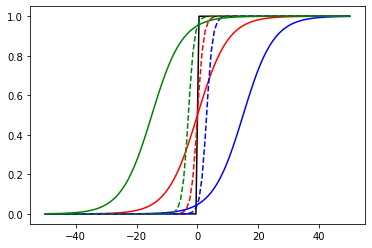

In [62]:
def drawSigmoid(w=0.5, b=0, style='-'):
    x = np.linspace(-50,50,100)
    #y = sigmoid(x * w + b)
    y = tf.sigmoid(x * w + b)
    plt.plot(x, y, style)

    
drawSigmoid(0.2,  0, 'r')
drawSigmoid(  1,  0, 'r--')

drawSigmoid(0.2, -3, 'b')
drawSigmoid(  1, -3, 'b--')


drawSigmoid(0.2,  3, 'g')
drawSigmoid(  1,  3, 'g--')


* tf.sigmoid(x)
    * $y = 1 / (1 + exp(-x))$

## 비용함수
* Hypothesis가 달라졌기 때문에 Cost 함수도 달라져야 한다.
* sigmoid 함수 결과에 MSE를 적용하면 Non-Convex 함수가 돼서 Local Minimize에 빠질 수 있다.
* log 함수를 이용해서 원래대로 Convex 함수로 만든다.
* $ cost(H(x), y) = 
  \begin{cases}
    -log(H(x)) & \quad\text{if } y=1\\
    -log(1-H(x)) & \quad\text {if } y=0
  \end{cases}$
* Cost  : $ \displaystyle cost(H(x), y) = \frac{1}{m}\sum_{i=1}^m[-ylog(H(x))-(1-y)log(1-H(x))]$
* Gradient : $\displaystyle\frac{\partial}{\partial{H(x)}} = \frac{1}{m}\sum_{i=1}^m((H(x)-y)x$
    * Linear Regression의 Gradient와 같다.
![image.png](https://i.imgur.com/nP2Q7TH.png)

c:\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, '-log(1-z)')

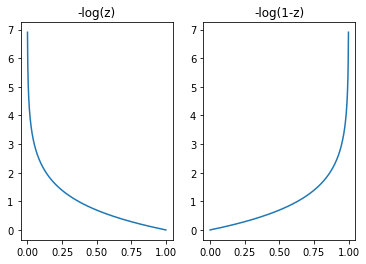

In [44]:
z = np.arange(0, 1, 0.001)

plt.subplot(1,2, 1)
plt.plot(z, -1 * np.log(z))
plt.title("-log(z)")
plt.subplot(1,2, 2)
plt.plot(z, -1 * np.log(1-z))
plt.title("-log(1-z)")

### 랜덤수 분류 예제

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

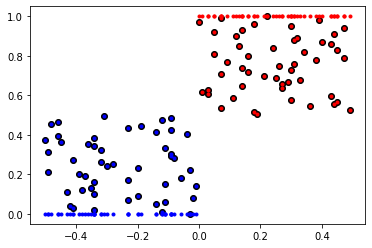

In [46]:
ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma,1))
Xb = np.random.randint(0,50, (mb,1))
#X = X + 200* np.random.randn(m)

X = np.float32(np.concatenate((Xa, Xb), axis=0))/100
y = np.zeros((m,1))
y[mb:, 0] = 1
#y[np.random.randint(0,100, 20)] = np.random.randint(0,2, 20)

temp = np.linspace(0,1,m).reshape(-1,1)
plt.plot(X ,temp, 'ko')
plt.plot(X[y==0],temp[y==0], 'b.' )
plt.plot(X[y==1],temp[y==1], 'r.' )
plt.plot(X[y==0] ,y[y==0], 'b.')
plt.plot(X[y==1], y[y==1], 'r.')


Initial W: 0.22199317108973948
epoch: 0  cost: 0.6658299279212951  gradient: -0.12071044530891031  W: 0.2232002755428286
epoch: 20  cost: 0.662927669286728  gradient: -0.12020221417450032  W: 0.2472889611387083
epoch: 40  cost: 0.660049803853035  gradient: -0.11969634943688036  W: 0.27127624891912355
epoch: 60  cost: 0.6571961116790772  gradient: -0.11919286431338051  W: 0.29516261339376176
epoch: 80  cost: 0.6543663680553437  gradient: -0.11869176098553076  W: 0.3189485306950762
epoch: 100  cost: 0.6515603655576706  gradient: -0.11819305048615085  W: 0.3426344785300071
epoch: 120  cost: 0.6487778782844543  gradient: -0.11769674189302828  W: 0.36622093621848567
epoch: 140  cost: 0.646018705368042  gradient: -0.11720283793903581  W: 0.38970838436984045
epoch: 160  cost: 0.643282619714737  gradient: -0.11671134589296  W: 0.4130973048936755
epoch: 180  cost: 0.6405694264173508  gradient: -0.11622226939366445  W: 0.4363881808031448
epoch: 200  cost: 0.6378789359331131  gradient: -0.1157356

(-5, 5)

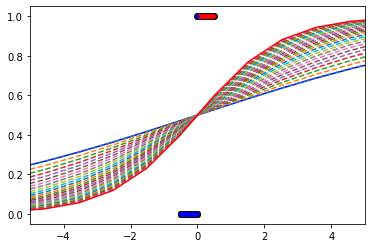

In [55]:
plt.plot(X ,y, 'ko')

np.random.seed(5)
W = np.random.rand()
print("Initial W:", W)
drawSigmoid(W, 0, 'b-')
learning_rate = 0.01
epochs = 500
for epoch in range(epochs):
    h = sigmoid(W*X)
    cost = 1/m * np.sum(-1.0 *y * np.log(h)-(1.0-y)*np.log(1.0-h))
    #gradient = 1/m * np.dot(X.T, (h - y))
    gradient = 1/m * np.sum( (h-y) * X)
    W = W - learning_rate * gradient
    if epoch % 20 == 0:
        print('epoch:', epoch, ' cost:', cost, ' gradient:', gradient, ' W:', W)
        drawSigmoid(W, 0, '--')
print('Final W:', W)
pred = sigmoid(W*X)
red = pred> 0.5
blue = pred<= 0.5
plt.plot(X[red], y[red], 'r.')
plt.plot(X[blue], y[blue], 'b.')
drawSigmoid(W, 0, 'r-')
plt.xlim(-5, 5)

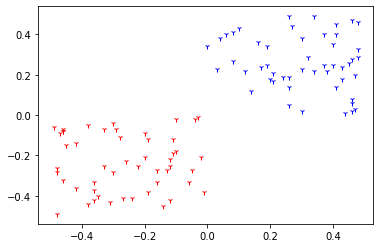

In [26]:
import tensorflow as tf

ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma, 2))
Xb = np.random.randint(0,50, (mb, 2))
X = np.concatenate((Xa, Xb), axis=0).astype(np.float32)/100

y = np.zeros((m,1), dtype=np.float32)
y[mb:] = 1
y = y.reshape(-1,1)

plt.plot(X[y[:,0]==0][:,0],X[y[:,0]==0][:,1], 'r1')
plt.plot(X[y[:,0]==1][:,0],X[y[:,0]==1][:,1], 'b1')

In [37]:
W = tf.Variable(tf.random.normal([2,1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

In [33]:
W = tf.Variable([[0.3], [0.3]], dtype=tf.float32)
b = tf.Variable([[0]], dtype=tf.float32)

step:0, cost:0.5809956192970276
step:1000, cost:0.38808220624923706
step:2000, cost:0.29392433166503906
step:3000, cost:0.23761872947216034
step:4000, cost:0.200445294380188
step:5000, cost:0.17411546409130096
step:6000, cost:0.15447987616062164
step:7000, cost:0.13925574719905853
step:8000, cost:0.12708982825279236
step:9000, cost:0.11713119596242905
step:10000, cost:0.10881839692592621
Accuracy:1.0


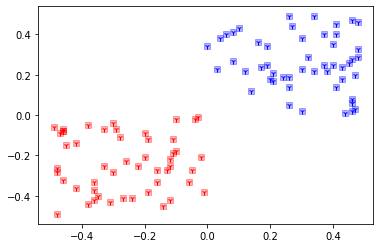

In [38]:
learing_rate = 0.01 
for step in range(10001):
    with tf.GradientTape() as tape:
        hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

        cost = -tf.reduce_mean(y* tf.math.log(hypothesis) + (1-y) * tf.math.log(1 - hypothesis))
        #cost = tf.reduce_mean(-y * tf.math.log(hypothesis) - (1-y) * tf.math.log(1 - hypothesis))
        #cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=hypothesis))
    d_W, d_b = tape.gradient(cost, [W, b])
    W.assign_sub(learing_rate * d_W)
    b.assign_sub(learing_rate * d_b)
    if step % 1000 == 0:
        print(f"step:{step}, cost:{cost}")

predict = tf.cast( (tf.sigmoid(tf.matmul(X, W) + b)) > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

print('Accuracy:{}'.format(accuracy))

plt.plot(X[y[:,0]==0][:,0],X[y[:,0]==0][:,1], 'r1')
plt.plot(X[y[:,0]==1][:,0],X[y[:,0]==1][:,1], 'b1')

plt.plot(X[predict[:,0]==0][:,0],X[predict[:,0]==0][:,1], 'rs', alpha=0.3)
plt.plot(X[predict[:,0]==1][:,0],X[predict[:,0]==1][:,1], 'bs', alpha=0.3)